# Demo: Masks

In [1]:
import autoroot
import jax
import jax.numpy as jnp
from finitevolx._src.masks.masks import (
    MaskDGrid, MaskCGrid
)
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
def init_mask_psi_rect(n: int=10, grid: str="c"):
    mask = jnp.ones((n,n))
    mask = mask.at[0].set(0.0)
    mask = mask.at[-1].set(0.0)
    mask = mask.at[:,0].set(0.0)
    mask = mask.at[:,-1].set(0.0)
    if grid == "c":
        masks = MaskCGrid.init_mask(mask, "psi")
    else:
        masks = MaskDGrid.init_mask(mask, "psi")
        
    return masks

def init_mask_psi_island(n: int=10, grid: str="c"):
    mask = jnp.ones((n,n))
    mask = mask.at[0].set(0.0)
    mask = mask.at[-1].set(0.0)
    mask = mask.at[:,0].set(0.0)
    mask = mask.at[:,-1].set(0.0)
    mask = mask.at[4:-4,4:-4].set(0.0)
    if grid == "c":
        masks = MaskCGrid.init_mask(mask, "psi")
    else:
        masks = MaskDGrid.init_mask(mask, "psi")
    return masks

def init_mask_psi_channel(n: int=10, grid: str="c"):
    mask = jnp.ones((n,3*n//4))
    mask = mask.at[:,0].set(0.0)
    mask = mask.at[:,-1].set(0.0)
    if grid == "c":
        masks = MaskCGrid.init_mask(mask, "psi")
    else:
        masks = MaskDGrid.init_mask(mask, "psi")
    return masks

def init_mask_q_realish(n: int=10, grid: str="c"):
    mask = jnp.ones((n,n))
    mask = mask.at[1,0].set(0.0)
    mask = mask.at[n-1,2].set(0.0)
    mask = mask.at[0,n-2].set(0.0)
    mask = mask.at[1,n-2].set(0.0)
    mask = mask.at[0,n-1].set(0.0)
    mask = mask.at[1,n-1].set(0.0)
    mask = mask.at[2,n-1].set(0.0)
    if grid == "c":
        masks = MaskCGrid.init_mask(mask, "q")
    else:
        masks = MaskDGrid.init_mask(mask, "q")
    return masks

In [7]:
n = 6
masks = init_mask_psi_rect(n, grid="d")

n = 10
masks = init_mask_psi_island(n, grid="d")

n = 6
masks = init_mask_q_realish(n, grid="d")

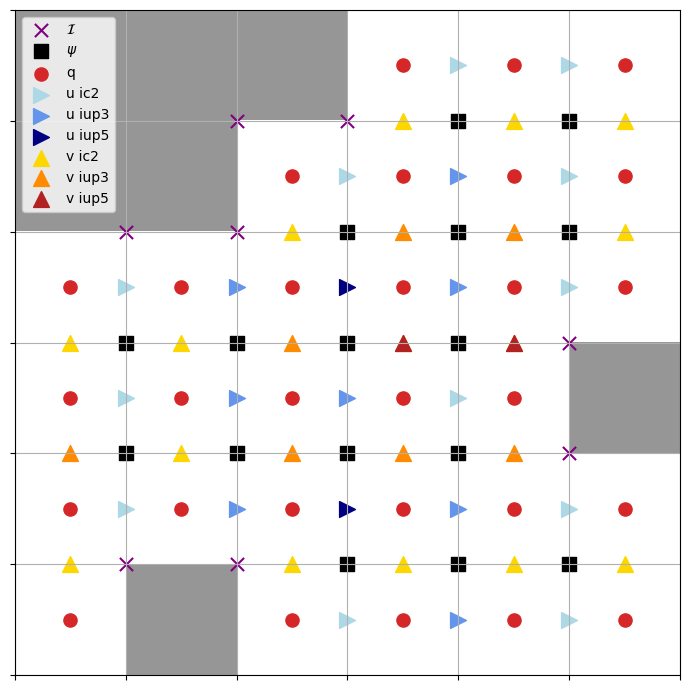

In [8]:
plt.ion()
fig,ax =plt.subplots(figsize=(7,7))
ax.imshow(masks.q.values.T, origin='lower', cmap='Greys_r', interpolation=None, vmin=-1, label="mask")
ax.set_xticks(np.arange(-.5,n+.5)), ax.set_yticks(np.arange(-.5,n+.5))

s = 90
s2 = 130


# PLOT BOUNDARIES
psi_xmin, psi_ymin = -.5, -.5
ax.scatter(psi_xmin+1+masks.psi.irrbound_xids,psi_ymin+1+masks.psi.irrbound_yids,
           s=s, marker='x', label='$\mathcal{I}$', color='purple')

# PLOT STREAM FUNCTION
psi_xmin, psi_ymin = -.5, -.5
mask_psi_ids = jnp.argwhere(masks.psi.values.squeeze())
ax.scatter(psi_xmin+mask_psi_ids[:,0], psi_ymin+mask_psi_ids[:,1],
          s=s, marker='s', label='$\\psi$', color='black')


# PLOT POTENTIAL VORTICITY
s = 90
s2 = 130
q_xmin, q_ymin = 0, 0
mask_q_ids = jnp.argwhere(masks.q.values.squeeze())
ax.scatter(q_xmin+mask_q_ids[:,0], q_ymin+mask_q_ids[:,1],
            s=s, marker='o', label='q', color='tab:red')

# PLOT ZONAL VELOCITY
u_xmin, u_ymin = -.5, 0
mask_u_ids = jnp.argwhere(masks.u.distbound1.squeeze())
ax.scatter(u_xmin+mask_u_ids[:,0], u_ymin+mask_u_ids[:,1],
            s=s2, marker='>', label='u ic2', color='lightblue')
mask_u_ids = jnp.argwhere(masks.u.distbound2.squeeze())
ax.scatter(u_xmin+mask_u_ids[:,0], u_ymin+mask_u_ids[:,1],
            s=s2, marker='>', label='u iup3', color='cornflowerblue')
mask_u_ids = jnp.argwhere(masks.u.distbound3plus.squeeze())
ax.scatter(u_xmin+mask_u_ids[:,0], u_ymin+mask_u_ids[:,1],
            s=s2, marker='>', label='u iup5', color='navy')

# PLOT MERIDIONAL VELOCITY
v_xmin, v_ymin = 0, -.5
mask_v_ids = jnp.argwhere(masks.v.distbound1.squeeze())
ax.scatter(v_xmin+mask_v_ids[:,0], v_ymin+mask_v_ids[:,1],
            s=s2, marker='^', label='v ic2', color='gold')
mask_v_ids = jnp.argwhere(masks.v.distbound2plus.squeeze())
ax.scatter(v_xmin+mask_v_ids[:,0], v_ymin+mask_v_ids[:,1],
            s=s2, marker='^', label='v iup3', color='darkorange')
mask_v_ids = jnp.argwhere(masks.v.distbound3plus.squeeze())
ax.scatter(v_xmin+mask_v_ids[:,0], v_ymin+mask_v_ids[:,1],
            s=s2, marker='^', label='v iup5', color='firebrick')


ax.grid()
plt.legend(loc='upper left')
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)
plt.tight_layout()
plt.show()

In [9]:
n = 6
masks = init_mask_psi_rect(n, grid="c")

n = 10
masks = init_mask_psi_island(n, grid="c")

n = 6
masks = init_mask_q_realish(n, grid="c")

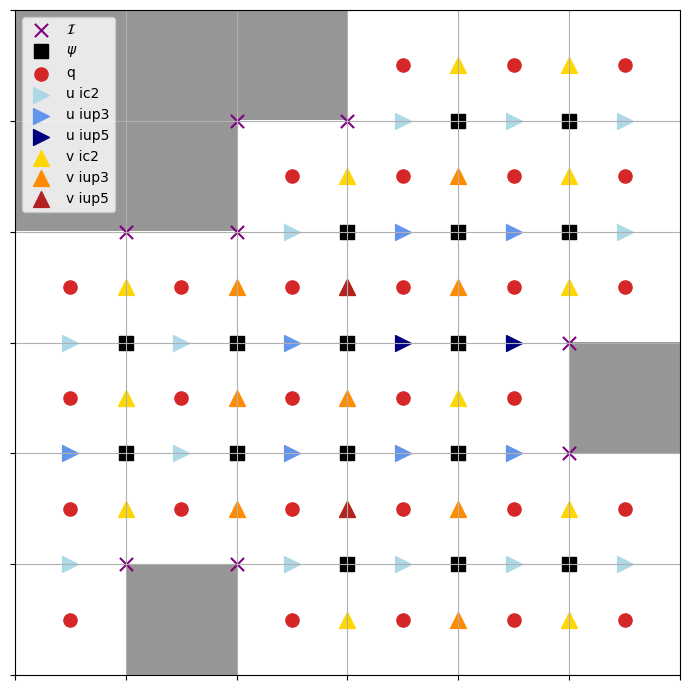

In [10]:
plt.ion()
fig,ax =plt.subplots(figsize=(7,7))
ax.imshow(masks.q.values.T, origin='lower', cmap='Greys_r', interpolation=None, vmin=-1, label="mask")
ax.set_xticks(np.arange(-.5,n+.5)), ax.set_yticks(np.arange(-.5,n+.5))

s = 90
s2 = 130


# PLOT BOUNDARIES
psi_xmin, psi_ymin = -.5, -.5
ax.scatter(psi_xmin+1+masks.psi.irrbound_xids,psi_ymin+1+masks.psi.irrbound_yids,
           s=s, marker='x', label='$\mathcal{I}$', color='purple')

# PLOT STREAM FUNCTION
psi_xmin, psi_ymin = -.5, -.5
mask_psi_ids = jnp.argwhere(masks.psi.values.squeeze())
ax.scatter(psi_xmin+mask_psi_ids[:,0], psi_ymin+mask_psi_ids[:,1],
          s=s, marker='s', label='$\\psi$', color='black')


# PLOT POTENTIAL VORTICITY
s = 90
s2 = 130
q_xmin, q_ymin = 0, 0
mask_q_ids = jnp.argwhere(masks.q.values.squeeze())
ax.scatter(q_xmin+mask_q_ids[:,0], q_ymin+mask_q_ids[:,1],
            s=s, marker='o', label='q', color='tab:red')

# PLOT ZONAL VELOCITY
u_xmin, u_ymin = 0, -.5
mask_u_ids = jnp.argwhere(masks.u.distbound1.squeeze())
ax.scatter(u_xmin+mask_u_ids[:,0], u_ymin+mask_u_ids[:,1],
            s=s2, marker='>', label='u ic2', color='lightblue')
mask_u_ids = jnp.argwhere(masks.u.distbound2.squeeze())
ax.scatter(u_xmin+mask_u_ids[:,0], u_ymin+mask_u_ids[:,1],
            s=s2, marker='>', label='u iup3', color='cornflowerblue')
mask_u_ids = jnp.argwhere(masks.u.distbound3plus.squeeze())
ax.scatter(u_xmin+mask_u_ids[:,0], u_ymin+mask_u_ids[:,1],
            s=s2, marker='>', label='u iup5', color='navy')

# PLOT MERIDIONAL VELOCITY
v_xmin, v_ymin = -.5, 0.
mask_v_ids = jnp.argwhere(masks.v.distbound1.squeeze())
ax.scatter(v_xmin+mask_v_ids[:,0], v_ymin+mask_v_ids[:,1],
            s=s2, marker='^', label='v ic2', color='gold')
mask_v_ids = jnp.argwhere(masks.v.distbound2plus.squeeze())
ax.scatter(v_xmin+mask_v_ids[:,0], v_ymin+mask_v_ids[:,1],
            s=s2, marker='^', label='v iup3', color='darkorange')
mask_v_ids = jnp.argwhere(masks.v.distbound3plus.squeeze())
ax.scatter(v_xmin+mask_v_ids[:,0], v_ymin+mask_v_ids[:,1],
            s=s2, marker='^', label='v iup5', color='firebrick')


ax.grid()
plt.legend(loc='upper left')
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)
plt.tight_layout()
plt.show()